In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('HeartDiseaseData.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


age, sex \\
chest_pain_type - rodzaje bólów w klatce piersiowej 0 - brak, 1 - ból bez duszności, 2 - ból i nieregularne duszności, 3 - ból i duszności \\
resting_blood_pressure - spoczynkowe ciśnienie krwi \\
cholestoral - poziom cholesterolu \\
fasting_blood_sugar - poziom cukru na czczo (0 - za wyoski, 1 - w normie) \\
rest_ecg - ocena wyników elektrokardiogramu (2 - w normie, 1 - drobne zaburzenia, 0 - nieprawidłowa praca serca) \\
Max_heart_rate - tętno \\
exercise_induced_angina - ból/dyskomfort w klatce piersiowej \\
oldpeak - obniżenie odcinka ST \\
slope - zmiana w odstępie ST  (0 - spadek, 1 -  spłaszczenie, 2 - wzrost) \\
vessels_colored_by_flourosopy - liczba głównych naczyń krwionośnych z nieprawidłowym przepływe (0-3) \\
thalassemia - niedokrwistość tarczowatokrwinkowa (0 - stała wada, 1 - wada odwracalna, 2 - w normie, 3 - brak wady) \\
target - w późniejszych badaniach zdiagnozowano chorobę serca (0 - Nie, 1 - Tak) 

<figure>
<center>
<img src='https://kredos.pl/images/artyku%C5%82y/ekg_zespol_qrs.jpg' />
</figure>

In [5]:
from sklearn.preprocessing import LabelEncoder

for col in ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina','slope', 'vessels_colored_by_flourosopy', 'thalassemia']:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

df.drop(['vessels_colored_by_flourosopy'], axis = 1, inplace = True)
df['rest_ecg'] = df['rest_ecg'].replace({2. : 0., 0. : 2.})
df['thalassemia'] = df['thalassemia'].replace({3. : 1., 1. : 3.})
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,thalassemia,target
0,52,1,3,125,212,1,0.0,168,0,1.0,0,1.0,0
1,53,1,3,140,203,0,1.0,155,1,3.1,2,1.0,0
2,70,1,3,145,174,1,0.0,125,1,2.6,2,1.0,0
3,61,1,3,148,203,1,0.0,161,0,0.0,0,1.0,0
4,62,0,3,138,294,0,0.0,106,0,1.9,1,0.0,0


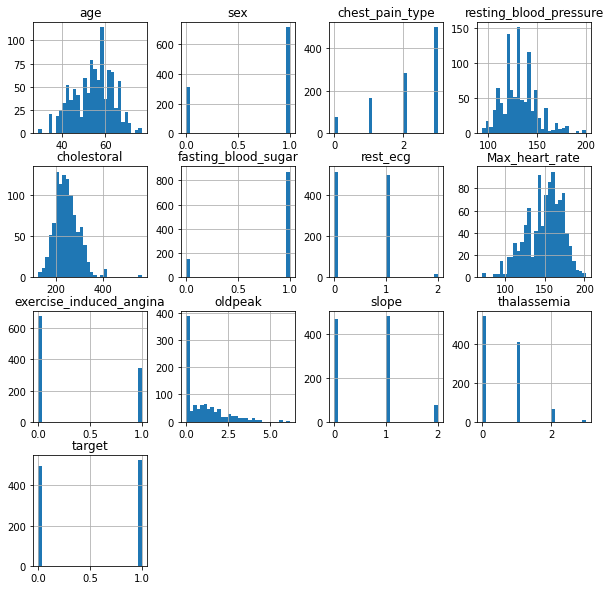

In [6]:
df.hist(bins=30, figsize = (10,10));

In [7]:
df.to_csv('data.csv', index=False)